In [1]:
import time
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np


In [2]:
corrs = np.concatenate([
    np.load("/ocean/projects/mth240012p/sapountz/lab3_fmri/results/ridge/ridge_boots/BERT/ridge_test_corrs_0-45000_diditinreverse.npy"),
    np.load("/ocean/projects/mth240012p/sapountz/lab3_fmri/results/ridge/ridge_boots/BERT/ridge_test_corrs_45000-94000.npy")
])

In [3]:
mean_cc = np.mean(corrs)
median_cc = np.median(corrs)
top_1_percentile = np.percentile(corrs, 99)
top_5_percentile = np.percentile(corrs, 95)

print("Mean CC:", mean_cc)
print("Median CC:", median_cc)
print("Top 1% CC:", top_1_percentile)
print("Top 5% CC:", top_5_percentile)

Mean CC: 0.012989372558967321
Median CC: 0.012462013626985553
Top 1% CC: 0.05515053079779411
Top 5% CC: 0.039473513930230894


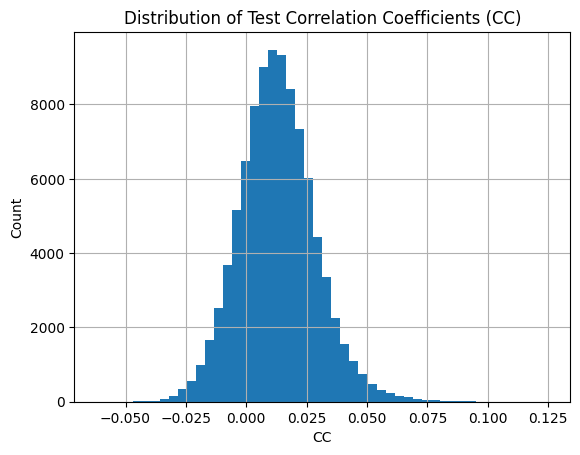

In [9]:
plt.hist(corrs, bins=50)
plt.title("Distribution of Test Correlation Coefficients (CC)")
plt.xlabel("CC")
plt.ylabel("Count")
plt.grid(True)

plt.savefig("cc_distribution.png", dpi=300, bbox_inches='tight')

plt.show()



/jet/home/sapountz/.conda/envs/env_214/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/jet/home/sapountz/.conda/envs/env_214/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


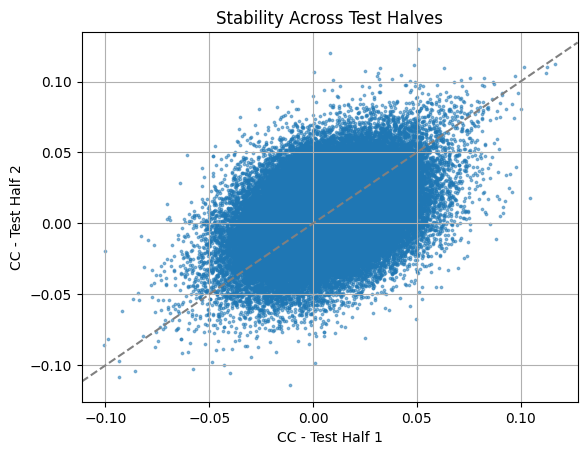

In [6]:
X_test_z = np.load("/ocean/projects/mth240012p/sapountz/lab3_fmri/results/ridge/inputs_4rdge/BERT/X_test_z.npy")   # full test input (shape: n_timepoints, n_features)
Y_test_z = np.load("/ocean/projects/mth240012p/sapountz/lab3_fmri/results/ridge/inputs_4rdge/BERT/Y_test_z.npy")   # full test targets (shape: n_timepoints, n_voxels)
wt2 = np.load("/ocean/projects/mth240012p/sapountz/lab3_fmri/results/ridge/ridge_boots/BERT/ridge_weights_0-45000_diditinreverse.npy")
wt1 = np.load("/ocean/projects/mth240012p/sapountz/lab3_fmri/results/ridge/ridge_boots/BERT/ridge_weights_45000-94000.npy")

wt = np.concatenate([wt1,wt2],axis=1)

n = X_test_z.shape[0]
half = n // 2

# Predict for each half
Y_pred_1 = X_test_z[:half] @ wt
Y_pred_2 = X_test_z[half:] @ wt

Y_true_1 = Y_test_z[:half,:wt.shape[1]]
Y_true_2 = Y_test_z[half:,:wt.shape[1]]

# Correlation per voxel in each half
def voxel_cc(y_true, y_pred):
    return np.array([np.corrcoef(y_true[:, i], y_pred[:, i])[0, 1] for i in range(y_true.shape[1])])

cc_1 = voxel_cc(Y_true_1, Y_pred_1)
cc_2 = voxel_cc(Y_true_2, Y_pred_2)

# Scatter plot to assess stability
plt.scatter(cc_1, cc_2, alpha=0.5, s=3)
plt.xlabel("CC - Test Half 1")
plt.ylabel("CC - Test Half 2")
plt.title("Stability Across Test Halves")
plt.axline((0, 0), slope=1, color='gray', linestyle='--')
plt.grid(True)

plt.savefig("stability1.png", dpi=300, bbox_inches='tight')

plt.show()


In [9]:
cc_1 = np.nan_to_num(cc_1)
cc_2 = np.nan_to_num(cc_2)
stability_score = np.corrcoef(cc_1, cc_2)[0, 1]
print("Stability (correlation of voxel CCs across halves):", stability_score)

Stability (correlation of voxel CCs across halves): 0.3865285371025345


### Second Ridge Analysis

In [2]:
corrs = np.concatenate([
    np.load("/ocean/projects/mth240012p/sapountz/lab3_fmri/results/ridge/ridge_boots/BERT/ridge_test_corrs_0-45000_date20250428.npy"),
    np.load("/ocean/projects/mth240012p/sapountz/lab3_fmri/results/ridge/ridge_boots/BERT/ridge_test_corrs_45000-95000_date20250428.npy")
])

In [3]:
mean_cc = np.mean(corrs)
median_cc = np.median(corrs)
top_1_percentile = np.percentile(corrs, 99)
top_5_percentile = np.percentile(corrs, 95)

print("Mean CC:", mean_cc)
print("Median CC:", median_cc)
print("Top 1% CC:", top_1_percentile)
print("Top 5% CC:", top_5_percentile)

Mean CC: 0.013560179383207582
Median CC: 0.012667525187823825
Top 1% CC: 0.060976123892569234
Top 5% CC: 0.04136599190312535


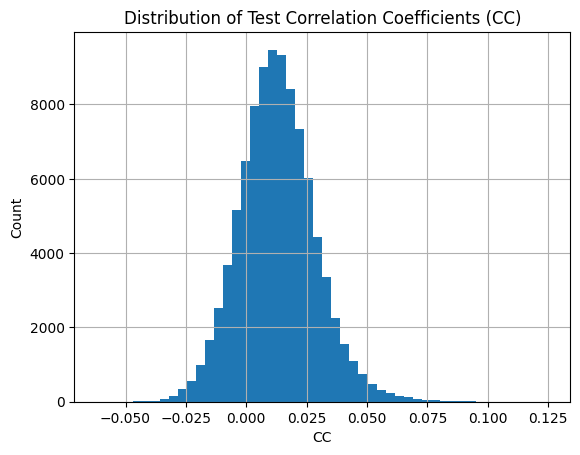

In [10]:
plt.hist(corrs, bins=50)
plt.title("Distribution of Test Correlation Coefficients (CC)")
plt.xlabel("CC")
plt.ylabel("Count")
plt.grid(True)

plt.savefig("cc_distribution2.png", dpi=300, bbox_inches='tight')

plt.show()

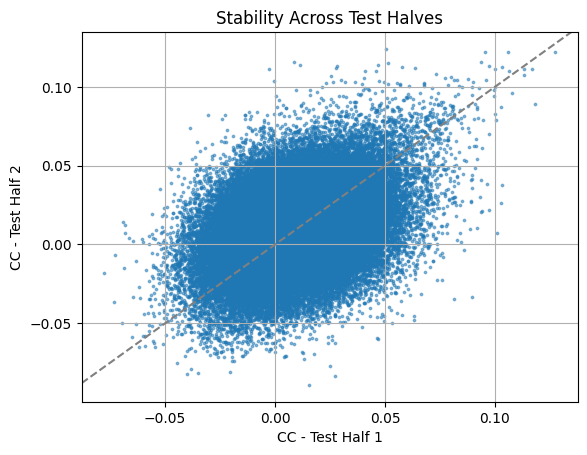

In [8]:
X_test_z = np.load("/ocean/projects/mth240012p/sapountz/lab3_fmri/results/ridge/inputs_4rdge/BERT/X_test_z.npy")   # full test input (shape: n_timepoints, n_features)
Y_test_z = np.load("/ocean/projects/mth240012p/sapountz/lab3_fmri/results/ridge/inputs_4rdge/BERT/Y_test_z.npy")   # full test targets (shape: n_timepoints, n_voxels)
wt2 = np.load("/ocean/projects/mth240012p/sapountz/lab3_fmri/results/ridge/ridge_boots/BERT/ridge_weights_0-45000_date20250428.npy")
wt1 = np.load("/ocean/projects/mth240012p/sapountz/lab3_fmri/results/ridge/ridge_boots/BERT/ridge_weights_45000-95000_date20250428.npy")

wt = np.concatenate([wt1,wt2],axis=1)

n = X_test_z.shape[0]
half = n // 2

# Predict for each half
Y_pred_1 = X_test_z[:half] @ wt
Y_pred_2 = X_test_z[half:] @ wt

Y_true_1 = Y_test_z[:half,:wt.shape[1]]
Y_true_2 = Y_test_z[half:,:wt.shape[1]]

# Correlation per voxel in each half
def voxel_cc(y_true, y_pred):
    return np.array([np.corrcoef(y_true[:, i], y_pred[:, i])[0, 1] for i in range(y_true.shape[1])])

cc_1 = voxel_cc(Y_true_1, Y_pred_1)
cc_2 = voxel_cc(Y_true_2, Y_pred_2)

# Scatter plot to assess stability
plt.scatter(cc_1, cc_2, alpha=0.5, s=3)
plt.xlabel("CC - Test Half 1")
plt.ylabel("CC - Test Half 2")
plt.title("Stability Across Test Halves")
plt.axline((0, 0), slope=1, color='gray', linestyle='--')
plt.grid(True)

plt.savefig("stability2.png", dpi=300, bbox_inches='tight')

plt.show()

In [6]:
cc_1 = np.nan_to_num(cc_1)
cc_2 = np.nan_to_num(cc_2)
stability_score = np.corrcoef(cc_1, cc_2)[0, 1]
print("Stability (correlation of voxel CCs across halves):", stability_score)


Stability (correlation of voxel CCs across halves): 0.34153641271970436
